In [65]:
from keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def function_1(x):
  return 3 * np.sin(np.pi*x)

In [67]:
X = (np.random.rand(500)*2)-1
X = np.sort(X)
X = X.reshape(500,1)
Y = function_1(X)

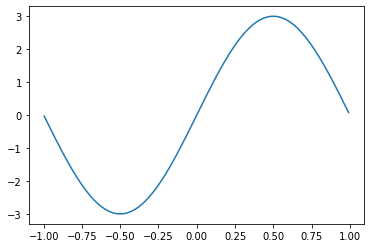

In [68]:
plt.plot(X,Y)

In [69]:
model = models.Sequential()
model.add(layers.Dense(2, activation = 'tanh', input_shape = (1, )))
model.add(layers.Dense(4, activation = 'tanh'))
model.add(layers.Dense(8, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'linear'))

In [70]:
model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 4         
                                                                 
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [72]:
X_val = (np.random.rand(500)*2)-1
X_val = np.sort(X)
X_val = X.reshape(500,1)
Y_val = function_1(X)

In [73]:
history = model.fit(X, Y,
          epochs = 5000,
          batch_size = 100,
          validation_data = (X_val, Y_val))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
5/5 [==============================] - 0s 11ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 2502/5000
5/5 [==============================] - 0s 15ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 2503/5000
5/5 [==============================] - 0s 13ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2504/5000
5/5 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2505/5000
5/5 [==============================] - 0s 11ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 2506/5000
5/5 [==============================] - 0s 14ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2507/5000
5/5 [================

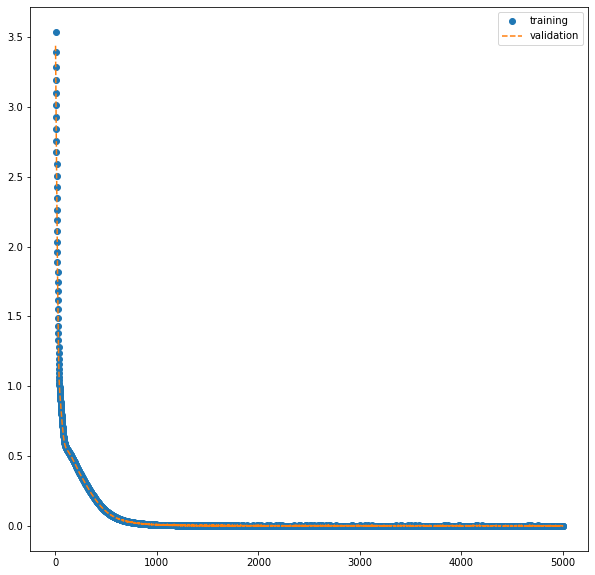

In [74]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [109]:
X_test = (np.random.rand(500)*2)-1
X_test = np.sort(X_test)
X_test = X_test.reshape(500,1)

In [110]:
a = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


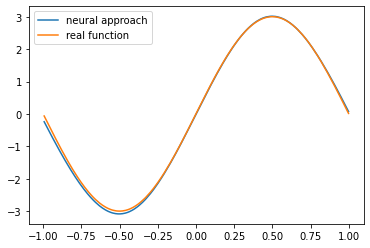

In [111]:
plt.plot(X_test, a, label = 'neural approach')
plt.plot(X_test, function_1(X_test), label = 'real function')
plt.legend()
plt.show()